## Imports

In [3]:
import numpy as np
from tqdm import tqdm
import math
import cv2
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from collections import deque

## Given variables


In [4]:
N = 20
a = 0.5
img = cv2.imread("Binaryzacja/tekstReczny.png", 0)
hist,bins = np.histogram(img.ravel(),256,[0,256])


## Plot img and his histogram

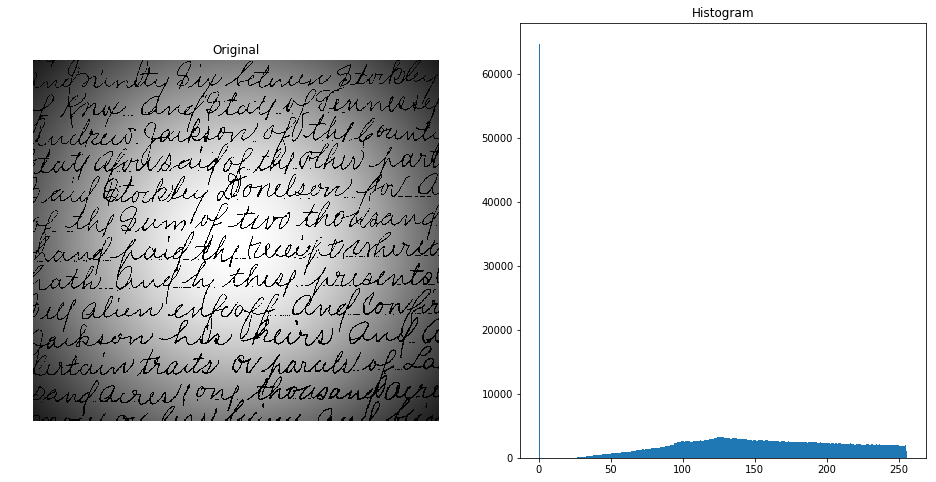

In [5]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.title("Original")
plt.subplot(1,2,2)
plt.hist(img.ravel(), 256, [0, 256])
plt.title("Histogram")
plt.show()

## Binarization manual and Otsu method

In [6]:
threshold = 50
binary_img = np.copy(img)
X, Y = binary_img.shape
ret, th = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

for i in tqdm(range(X)):
    for j in range(Y):
        if img[i, j] > threshold:
            binary_img[i, j] = 0
        else:
            binary_img[i, j] = 255            

100%|██████████| 686/686 [00:00<00:00, 996.14it/s]


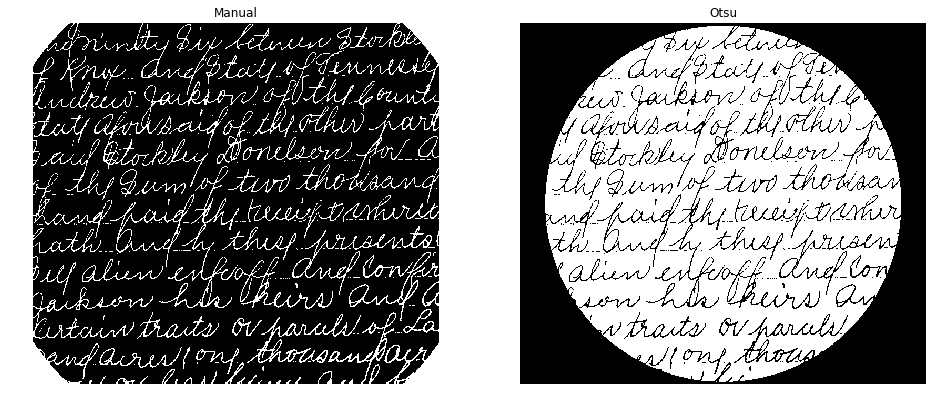

In [7]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(binary_img, cmap="gray")
plt.axis("off")
plt.title("Manual")
plt.subplot(1,2,2)
plt.imshow(th, cmap="gray")
plt.title("Otsu")
plt.axis("off")
plt.show()

## Binarization with moving mean

In [8]:
binary_moving_mean_img = np.copy(img)
queue = deque(np.zeros(N))


for i in tqdm(range(X)):
    for j in range(Y):
        z = img[i, j]
        queue.popleft()
        queue.append(z)
        m = np.mean(queue)
        T = a * m
        if z > T:
            binary_moving_mean_img[i, j] = 255
        else:
            binary_moving_mean_img[i, j] = 0



100%|██████████| 686/686 [00:08<00:00, 80.63it/s]


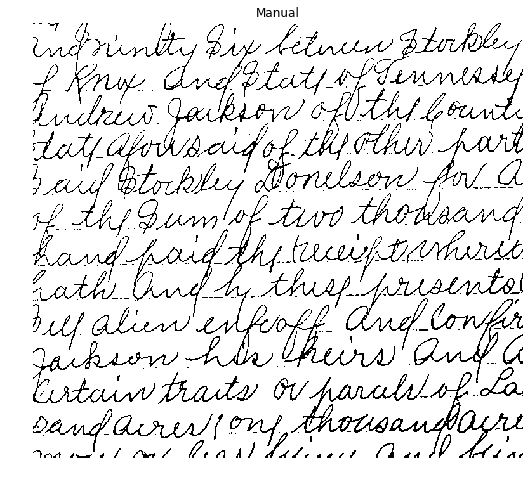

In [9]:
plt.figure(figsize=(16,8))
plt.subplot(1,1,1)
plt.imshow(binary_moving_mean_img, cmap="gray")
plt.axis("off")
plt.title("Manual")
plt.show()